# Test of the neural net architecture on one photo to see how good it learns on one example

In [40]:
import cv2
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, InputLayer,UpSampling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.chdir('C:/Users/Hugo/Desktop/Courses/DeepLearning.ai/Image_DB/LandWater')

Neural Net architecture has been inspired by https://blog.floydhub.com/colorizing-b-w-photos-with-neural-networks/

In [41]:
# Get images
image = plt.imread('Image_target.png')
image=np.array(image, dtype=float)
image=image[:,:,0:3]


image=cv2.resize(image,(400,400))
print(image.shape)

# Import map images into the lab colorspace
X = plt.imread('Image_target.png',cv2.COLOR_BGR2GRAY)
X = cv2.cvtColor(X, cv2.COLOR_BGR2GRAY)
X = np.array(X, dtype = float)
X = X
X = cv2.resize(X,(400,400))
Y = image
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 3)


# Building the neural network
model2 = Sequential()
model2.add(InputLayer(input_shape=(None, None, 1)))
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))

# Finish model
model2.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

#Train the neural network
model2.fit(x=X, y=Y, batch_size=1, epochs=200) #good results are obtained with 200 epochs  uts it's getting really good with 500
print(model2.evaluate(X, Y, batch_size=1))

(400, 400, 3)
Train on 1 samples
Epoch 1/200
1/1 [==============================] - 2s 2s/sample - loss: 1.2327 - accuracy: 0.1108
Epoch 2/200
1/1 [==============================] - 1s 665ms/sample - loss: 0.5451 - accuracy: 0.8777
Epoch 3/200
1/1 [==============================] - 1s 674ms/sample - loss: 0.0968 - accuracy: 0.6347
Epoch 4/200
1/1 [==============================] - 1s 676ms/sample - loss: 0.1468 - accuracy: 0.0395
Epoch 5/200
1/1 [==============================] - 1s 805ms/sample - loss: 0.0307 - accuracy: 0.2131
Epoch 6/200
1/1 [==============================] - 1s 681ms/sample - loss: 0.0280 - accuracy: 0.6325
Epoch 7/200
1/1 [==============================] - 1s 704ms/sample - loss: 0.0279 - accuracy: 0.8576
Epoch 8/200
1/1 [==============================] - 1s 692ms/sample - loss: 0.0291 - accuracy: 0.8830
Epoch 9/200
1/1 [==============================] - 1s 667ms/sample - loss: 0.0302 - accuracy: 0.8824
Epoch 10/200
1/1 [==============================] - 1s 647ms/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


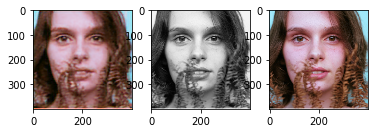

In [42]:
output=model2.predict(X)

fig, ax = plt.subplots(1,3)
ax[0].imshow(output[0])
ax[1].imshow(X[0][:,:,0], cmap='Greys_r')
ax[2].imshow(image)
#imsave('Image_result_without_lab3.png',np.abs(output[0]))

Let's try with a dog holding a watermelon slice

Train on 1 samples
Epoch 1/500
1/1 [==============================] - 1s 1s/sample - loss: 0.2680 - accuracy: 0.0450
Epoch 2/500
1/1 [==============================] - 0s 254ms/sample - loss: 0.2567 - accuracy: 0.0490
Epoch 3/500
1/1 [==============================] - 0s 232ms/sample - loss: 0.2348 - accuracy: 0.0497
Epoch 4/500
1/1 [==============================] - 0s 245ms/sample - loss: 0.1941 - accuracy: 0.0501
Epoch 5/500
1/1 [==============================] - 0s 234ms/sample - loss: 0.1306 - accuracy: 0.0502
Epoch 6/500
1/1 [==============================] - 0s 241ms/sample - loss: 0.0637 - accuracy: 0.0539
Epoch 7/500
1/1 [==============================] - 0s 226ms/sample - loss: 0.0504 - accuracy: 0.0603
Epoch 8/500
1/1 [==============================] - 0s 228ms/sample - loss: 0.0741 - accuracy: 0.1683
Epoch 9/500
1/1 [==============================] - 0s 237ms/sample - loss: 0.0651 - accuracy: 0.8386
Epoch 10/500
1/1 [==============================] - 0s 238ms/sample - loss:

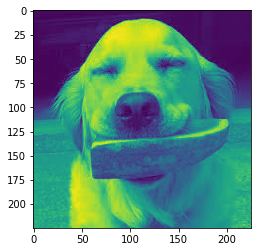

In [25]:
# Get images
image = plt.imread('dog.jpg')

# Import map images into the lab colorspace
X = plt.imread('dog.jpg',cv2.COLOR_BGR2GRAY)
X = cv2.cvtColor(X, cv2.COLOR_BGR2GRAY)
X = np.array(X, dtype=float)
#X = np.array(X, dtype = float)
plt.imshow(X)
Y = image
Y = cv2.resize(Y,(232,232))
X = X.reshape(1, 225, 225, 1)/255
Y = Y.reshape(1, 232, 232, 3)/255


# Building the neural network
model1 = Sequential()
model1.add(InputLayer(input_shape=(None, None, 1)))
model1.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))

# Finish model
model1.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

#Train the neural network
model1.fit(x=X, y=Y, batch_size=1, epochs=500)
print(model1.evaluate(X, Y, batch_size=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


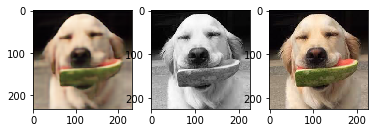

In [31]:
output=model1.predict(X)
# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(output[0])
ax[1].imshow(X[0][:,:,0], cmap='Greys_r')
ax[2].imshow(image)

imsave('Dog_predicted.png', np.abs(output[0]))
imsave('DogB&W.png',X[0][:,:,0], cmap='Greys_r')

Finally let's test the architecture with the Netflix logo

In [38]:
image = imread('netflix.png')
image=image[:,:,0:3]
image.shape

#image=cv2.resize(image,(1504,1504))
print(image.shape)

X = plt.imread('netflix.png',cv2.COLOR_BGR2GRAY)
X = cv2.cvtColor(X, cv2.COLOR_BGR2GRAY)
X = np.array(X, dtype = float)
X = X
#X = cv2.resize(X,(1500,1500))
Y = np.array(image,dtype=float)
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 3)


# Building the neural network
model3 = Sequential()
model3.add(InputLayer(input_shape=(None, None, 1)))
model3.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(UpSampling2D((2, 2)))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))

# Finish model
model3.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

#Train the neural network
model3.fit(x=X, y=Y, batch_size=1, epochs=50)
print(model3.evaluate(X, Y, batch_size=1))

(400, 400, 3)
Train on 1 samples
Epoch 1/50
1/1 [==============================] - 2s 2s/sample - loss: 0.0534 - accuracy: 0.4189
Epoch 2/50
1/1 [==============================] - 0s 472ms/sample - loss: 0.0422 - accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 458ms/sample - loss: 0.0402 - accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 1s 502ms/sample - loss: 0.0285 - accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 472ms/sample - loss: 0.0283 - accuracy: 0.9998
Epoch 6/50
1/1 [==============================] - 1s 503ms/sample - loss: 0.0213 - accuracy: 0.9969
Epoch 7/50
1/1 [==============================] - 0s 441ms/sample - loss: 0.0111 - accuracy: 0.9948
Epoch 8/50
1/1 [==============================] - 0s 460ms/sample - loss: 0.0134 - accuracy: 0.9947
Epoch 9/50
1/1 [==============================] - 0s 456ms/sample - loss: 0.0131 - accuracy: 0.9977
Epoch 10/50
1/1 [==============================] - 0s 464ms/sample - l

(400, 400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


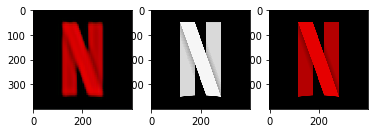

In [39]:
#output=model3.predict(X)
image = imread('netflix.png')

image=image[:,:,0:3]
print(image.shape)
output=model3.predict(X)
# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(output[0], label='Predicted')
ax[1].imshow(X[0][:,:,0], cmap='Greys_r',label='B&W')
ax[2].imshow(image, label="target")

imsave('Netflix_predicted.png', np.abs(output[0]))
imsave('Netflix_B&W.png',X[0][:,:,0], cmap='Greys_r')